In [ ]:
import numpy as np
import imageio
%matplotlib inline
import matplotlib.pyplot as plt
import math
import cv2
from random import seed
from random import randint
import networkx as nx
import timeit
from networkx.drawing.nx_pydot import write_dot
from scipy.spatial import distance

numberOfDays=40
walksPerDay=1
previousDay=0
dist=5
eucld=0
pfinal=0
seed()
relationshipFile = open("relationship.txt", "a")
relationshipFile2 = open("relationship2.txt", "a")
infoFile = open('info.txt','a')
resultlist = open("resultlist.txt", "a")
squaretext = open("squaretext.txt","a")
nodeList=[]
newInfected=[]
currentDay=[]
numberOfPeople=2000
numberOfSteps=12000
stepsByHour=500
numberOfInfected=0
numberOfInfectius=1
numberOfSusceptible=1999
people=dict(ID=['source','destination','state','virusLoad','virusLoadIncreaseRatio','pTalk','pCough','queue','roll','path','counterpath','flag',])
states=['susceptible','infected','infectius','repaired']
hotspot=[250,210,180]
warmspot=[160,150,140,130]
coldspot=[60,50,40]
densityReductor=2
movingchance=math.floor((numberOfSteps-walksPerDay*150)/walksPerDay)
terminalCondition=0.99
contact_list_less_than_two=np.zeros(shape=numberOfPeople)
list1=[]
list2=[]
filenames=[]
filenames2=[]
contactQuarantineStep=11000
contactCheckDay=2
quarantineDuration=10
contactDuration=3
ResponseTime=1
contactDictionary={}
contactDictionary=dict()
vulnerability=[0,1,2,3,4,5]
pc=0.8
ps=0.5
pt=0.5
vc=2
vs=3
vt=0.5
vb=0.2
vlc=np.zeros(shape=(11,5))
vlc[0]=[0.8,0.1,0.05,0.05,0.1]
vlc[1]=[0.8,0.1,0.05,0.05,0.15]
vlc[2]=[0.8,0.1,0.05,0.05,0.2]
vlc[3]=[0.8,0.1,0.05,0.05,0.2]
vlc[4]=[0.8,0.1,0.05,0.05,0.2]
vlc[5]=[0.8,0.15,0.05,0.05,0.3]
vlc[6]=[0.8,0.20,0.05,0.05,0.4]
vlc[7]=[0.8,0.25,0.05,0.05,0.5]
vlc[8]=[0.8,0.30,0.05,0.05,0.6]
vlc[9]=[0.8,0.35,0.05,0.05,0.7]
vlc[10]=[0.8,0.40,0.05,0.05,0.8]
days_ContactDictionary=[]
chanceToMove={
    '0':2,
    '500':2,
    '1000':1,
    '1500':1,
    '2000':1,
    '2500':2,
    '3000':10,
    '3500':35,
    '4000':35,
    '4500':30,
    '5000':25,
    '5500':25,
    '6000':20,
    '6500':20,
    '7000':15,
    '7500':15,
    '8000':20,
    '8500':30,
    '9000':35,
    '9500':35,
    '10000':30,
    '10500':25,
    '11000':15,
    '11500':5
    
 
}

chanceToMoveMatrix=np.zeros(shape=12000)
for i in range(0,len(chanceToMoveMatrix)):
    if i<=500:
        chanceToMoveMatrix[i]=2
    elif i<=1000:
        chanceToMoveMatrix[i]=2
    elif i<=1500:
        chanceToMoveMatrix[i]=1
    elif i<=2000:
        chanceToMoveMatrix[i]=1
    elif i<=2500:
        chanceToMoveMatrix[i]=1
    elif i<=3000:
        chanceToMoveMatrix[i]=2
    elif i<=3500:
        chanceToMoveMatrix[i]=10
    elif i<=4000:
        chanceToMoveMatrix[i]=35
    elif i<=4500:
        chanceToMoveMatrix[i]=35
    elif i<=5000:
        chanceToMoveMatrix[i]=35
    elif i<=5500:
        chanceToMoveMatrix[i]=25
    elif i<=6000:
        chanceToMoveMatrix[i]=25
    elif i<=6500:
        chanceToMoveMatrix[i]=20
    elif i<=7000:
        chanceToMoveMatrix[i]=20
    elif i<=7500:
        chanceToMoveMatrix[i]=15
    elif i<=8000:
        chanceToMoveMatrix[i]=15
    elif i<=8500:
        chanceToMoveMatrix[i]=20
    elif i<=9000:
        chanceToMoveMatrix[i]=30
    elif i<=9500:
        chanceToMoveMatrix[i]=35
    elif i<=10000:
        chanceToMoveMatrix[i]=35
    elif i<=10500:
        chanceToMoveMatrix[i]=30
    elif i<=11000:
        chanceToMoveMatrix[i]=25
    elif i<=11500:
        chanceToMoveMatrix[i]=15
    else:
        chanceToMoveMatrix[i]=5
    

def attractionLeveling(attractionMap):
    hotDistance=5
    warmDistance=30
    flag=0
    for i in range(0,len(attractionMap)):
        for j in range(0,len(attractionMap[i])):
            if attractionMap[i][j]==100:
                flag=1
                attractionMap[i][j]=0
                attractionMap2[i][j]=0
                for k in range(1,warmDistance+1):
                        for l in range(1,warmDistance+1):
                            if(i+k<len(attractionMap)):
                                if(j+l<len(attractionMap[i])):
                                    if(k<hotDistance and l<hotDistance):
                                        value = randint(0, len(hotspot)-1)
                                        if attractionMap[k+i][j+l]==255:
                                            attractionMap[k+i][j+l]=hotspot[value]
                                            if value==0:
                                                attractionMap2[k+i][j+l]=10
                                            elif value==1:
                                                attractionMap2[k+i][j+l]=9
                                            else:
                                                attractionMap2[k+i][j+l]=8
                                        elif attractionMap[k+i][j+l]==0:
                                            pass
                                        elif attractionMap[k+i][j+l]==100:
                                            pass
                                        elif attractionMap[k+i][j+l]<hotspot[value] and attractionMap[k+i][j+l] not in hotspot:
                                            attractionMap[k+i][j+l]=hotspot[value]
                                            if value==0:
                                                attractionMap2[k+i][j+l]=10
                                            elif value==1:
                                                attractionMap2[k+i][j+l]=9
                                            else:
                                                attractionMap2[k+i][j+l]=8
                                    else:
                                        value = randint(0, len(warmspot)-1)
                                        if attractionMap[k+i][j+l]==255:
                                            attractionMap[k+i][j+l]=warmspot[value]
                                            if value==0:
                                                attractionMap2[k+i][j+l]=7
                                            elif value==1:
                                                attractionMap2[k+i][j+l]=6
                                            elif value==2:
                                                attractionMap2[k+i][j+l]=5
                                            elif value==3:
                                                attractionMap2[k+i][j+l]=4
                                        elif attractionMap[k+i][j+l]==0:
                                            pass
                                        elif attractionMap[k+i][j+l]==100:
                                            pass
                                        elif attractionMap[k+i][j+l]<warmspot[value] and (attractionMap[k+i][j+l] not in warmspot):
                                            attractionMap[k+i][j+l]=warmspot[value]
                                            if value==0:
                                                attractionMap2[k+i][j+l]=7
                                            elif value==1:
                                                attractionMap2[k+i][j+l]=6
                                            elif value==2:
                                                attractionMap2[k+i][j+l]=5
                                            elif value==3:
                                                attractionMap2[k+i][j+l]=4
                                if(j-l>0):
                                    if(k<hotDistance and l<hotDistance):
                                        value = randint(0, len(hotspot)-1)
                                        if attractionMap[k+i][j-l]==255:
                                            attractionMap[k+i][j-l]=hotspot[value]
                                            if value==0:
                                                attractionMap2[k+i][j-l]=10
                                            elif value==1:
                                                attractionMap2[k+i][j-l]=9
                                            else:
                                                attractionMap2[k+i][j-l]=8
                                        elif attractionMap[k+i][j-l]==0:
                                            pass
                                        elif attractionMap[k+i][j-l]==100:
                                            pass
                                        elif attractionMap[k+i][j-l]<hotspot[value] and (attractionMap[k+i][j-l] not in hotspot):
                                            attractionMap[k+i][j-l]=hotspot[value]
                                            if value==0:
                                                attractionMap2[k+i][j-l]=10
                                            elif value==1:
                                                attractionMap2[k+i][j-l]=9
                                            else:
                                                attractionMap2[k+i][j-l]=8
                                    else:
                                        value = randint(0, len(warmspot)-1)
                                        if attractionMap[k+i][j-l]==255:
                                            attractionMap[k+i][j-l]=warmspot[value]
                                            if value==0:
                                                attractionMap2[k+i][j-l]=7
                                            elif value==1:
                                                attractionMap2[k+i][j-l]=6
                                            elif value==2:
                                                attractionMap2[k+i][j-l]=5
                                            elif value==3:
                                                attractionMap2[k+i][j-l]=4
                                        elif attractionMap[k+i][j-l]==0:
                                            pass
                                        elif attractionMap[k+i][j-l]==100:
                                            pass
                                        elif attractionMap[k+i][j-l]<warmspot[value] and(attractionMap[k+i][j-l] not in warmspot):
                                            attractionMap[k+i][j-l]=warmspot[value]
                                            if value==0:
                                                attractionMap2[k+i][j-l]=7
                                            elif value==1:
                                                attractionMap2[k+i][j-l]=6
                                            elif value==2:
                                                attractionMap2[k+i][j-l]=5
                                            elif value==3:
                                                attractionMap2[k+i][j-l]=4
                            if(i-k>0):
                                if(j+l<len(attractionMap[i])):
                                    if(k<hotDistance and l<hotDistance):
                                        value = randint(0, len(hotspot)-1)
                                        if attractionMap[i-k][j+l]==255:
                                            attractionMap[i-k][j+l]=hotspot[value]
                                            if value==0:
                                                attractionMap2[i-k][j+l]=10
                                            elif value==1:
                                                attractionMap2[i-k][j+l]=9
                                            else:
                                                attractionMap2[i-k][j+l]=8                                           
                                        elif attractionMap[i-k][j+l]==0:
                                            pass
                                        elif attractionMap[i-k][j+l]==100:
                                            pass
                                        elif attractionMap[i-k][j+l]<hotspot[value] and(attractionMap[i-k][j+l] not in hotspot):
                                            attractionMap[i-k][j+l]=hotspot[value]
                                            if value==0:
                                                attractionMap2[i-k][j+l]=10
                                            elif value==1:
                                                attractionMap2[i-k][j+l]=9
                                            else:
                                                attractionMap2[i-k][j+l]=8           
                                    else:
                                        value = randint(0, len(warmspot)-1)
                                        if attractionMap[i-k][j+l]==255:
                                            attractionMap[i-k][j+l]=warmspot[value]
                                            if value==0:
                                                attractionMap2[i-k][j+l]=7
                                            elif value==1:
                                                attractionMap2[i-k][j+l]=6
                                            elif value==2:
                                                attractionMap2[i-k][j+l]=5
                                            elif value==3:
                                                attractionMap2[i-k][j+l]=4
                                        elif attractionMap[i-k][j+l]==0:
                                            pass
                                        elif attractionMap[i-k][j+l]==100:
                                            pass
                                        elif attractionMap[i-k][j+l]<warmspot[value] and (attractionMap[i-k][j+l] not in warmspot):
                                            attractionMap[i-k][j+l]=warmspot[value]
                                            if value==0:
                                                attractionMap2[i-k][j+l]=7
                                            elif value==1:
                                                attractionMap2[i-k][j+l]=6
                                            elif value==2:
                                                attractionMap2[i-k][j+l]=5
                                            elif value==3:
                                                attractionMap2[i-k][j+l]=4
                                if(j-l>0):
                                    if(k<hotDistance and l<hotDistance):
                                        value = randint(0, len(hotspot)-1)
                                        if attractionMap[i-k][j-l]==255:
                                            attractionMap[i-k][j-l]=hotspot[value]
                                            if value==0:
                                                attractionMap2[i-k][j-l]=10
                                            elif value==1:
                                                attractionMap2[i-k][j-l]=9
                                            else:
                                                attractionMap2[i-k][j-l]=8           
                                        elif attractionMap[i-k][j-l]==0:
                                            pass
                                        elif attractionMap[i-k][j-l]==100:
                                            pass
                                        elif attractionMap[i-k][j-l]<hotspot[value] and(attractionMap[i-k][j-l] not in hotspot):
                                            attractionMap[i-k][j-l]=hotspot[value]
                                            if value==0:
                                                attractionMap2[i-k][j-l]=10
                                            elif value==1:
                                                attractionMap2[i-k][j-l]=9
                                            else:
                                                attractionMap2[i-k][j-l]=8           
                                    else:
                                        value = randint(0, len(warmspot)-1)
                                        if attractionMap[i-k][j-l]==255:
                                            attractionMap[i-k][j-l]=warmspot[value]
                                            if value==0:
                                                attractionMap2[i-k][j-l]=7
                                            elif value==1:
                                                attractionMap2[i-k][j-l]=6
                                            elif value==2:
                                                attractionMap2[i-k][j-l]=5
                                            elif value==3:
                                                attractionMap2[i-k][j-l]=4
                                        elif attractionMap[i-k][j-l]==0:
                                            pass
                                        elif attractionMap[i-k][j-l]==100:
                                            pass
                                        elif attractionMap[i-k][j-l]<warmspot[value] and (attractionMap[i-k][j-l] not in warmspot):
                                            attractionMap[i-k][j-l]=warmspot[value]
                                            if value==0:
                                                attractionMap2[i-k][j-l]=7
                                            elif value==1:
                                                attractionMap2[i-k][j-l]=6
                                            elif value==2:
                                                attractionMap2[i-k][j-l]=5
                                            elif value==3:
                                                attractionMap2[i-k][j-l]=4
    for i in range(0,len(attractionMap)):
        if flag==0:
                break
        for j in range(0,len(attractionMap[i])):
            if attractionMap[i][j]==255:
                value = randint(0, len(coldspot)-1)
                attractionMap[i][j]=coldspot[value]
                if value==0:
                    attractionMap2[i][j]=1                    
                elif value==1:
                    attractionMap2[i][j]=2        
                elif value==2:
                    attractionMap2[i][j]=3
            elif attractionMap[i][j]==100:
                attractionMap[i][j]=0
                attractionMap2[i][j]=0
    return attractionMap

def attractionMapping(Mmap):
    attractionMap=np.array(Mmap);
    for i in range(0,len(Mmap)):
        for j in range(0,len(Mmap[i])):
            if (Mmap[i][j]!=0 and Mmap[i][j]!=255):
                attractionMap[i][j]=100
    attractionMap2=attractionMap
    attractionMap=attractionLeveling(attractionMap)
    return attractionMap

def coloring(backtorgb):
    for i in range(0,len(backtorgb)):
        for j in range(0,len(backtorgb[i])):
            if(attractionMap2[i][j]==10):
                backtorgb[i][j][2]=139
                backtorgb[i][j][0]=0
                backtorgb[i][j][1]=0
            elif(attractionMap2[i][j]==9):
                backtorgb[i][j][2]=255
                backtorgb[i][j][0]=0
                backtorgb[i][j][1]=0
            elif(attractionMap2[i][j]==8):
                backtorgb[i][j][2]=255
                backtorgb[i][j][0]=0
                backtorgb[i][j][1]=140
            elif(attractionMap2[i][j]==7):
                backtorgb[i][j][2]=255
                backtorgb[i][j][0]=0
                backtorgb[i][j][1]=165
            elif(attractionMap2[i][j]==6):
                backtorgb[i][j][2]=230
                backtorgb[i][j][0]=0
                backtorgb[i][j][1]=80
            elif(attractionMap2[i][j]==5):
                backtorgb[i][j][2]=255
                backtorgb[i][j][0]=0
                backtorgb[i][j][1]=255
            elif(attractionMap2[i][j]==4):
                backtorgb[i][j][2]=144
                backtorgb[i][j][0]=144
                backtorgb[i][j][1]=238
            elif(attractionMap2[i][j]==3):
                backtorgb[i][j][2]=0
                backtorgb[i][j][0]=255
                backtorgb[i][j][1]=255
            elif(attractionMap2[i][j]==2):
                backtorgb[i][j][2]=255
                backtorgb[i][j][0]=255
                backtorgb[i][j][1]=0
            elif(attractionMap2[i][j]==1):
                backtorgb[i][j][2]=0
                backtorgb[i][j][0]=255
                backtorgb[i][j][1]=0
            else:
                backtorgb[i][j][2]=0
                backtorgb[i][j][0]=0
                backtorgb[i][j][1]=0       
    cv2.imwrite('output.png', backtorgb)
    #cv2.imwrite('output2.png', attractionMap)\n",
    stop = timeit.default_timer()
    print('Time: ', stop - start)

def createGraph(Gmap):
    for i in range (0,len(idMap)):
        for j in range(0,len(idMap[i])):
            if idMap[i][j]!=0:
                Gmap.add_node(str(i)+','+str(j))
                Gmap.nodes[str(i)+','+str(j)]['coordinates']=[i,j]
    #initializing weights\n",
    for i in range (0,len(idMap)):
        for j in range(0,len(idMap[i])):
            if (j+1<len(idMap[i])) and idMap[i][j]!=0 and idMap[i][j+1]!=0: 
                Gmap.add_edge(str(i)+','+str(j),str(i)+','+str(j+1),distanc=10-attractionMap2[i][j] + 10-attractionMap2[i][j+1] + 1)
                #print(Gmap.edges[str(i)+','+str(j), str(i)+','+str(j+1)][weight])
            if (i+1<len(idMap) and (j-1>=0) and idMap[i+1][j-1]!=0 and idMap[i][j]!=0 ):
                Gmap.add_edge(str(i)+','+str(j),str(i+1)+','+str(j-1),distanc=10-attractionMap2[i][j] + 10-attractionMap2[i+1][j-1] + 1)
            if (i+1<len(idMap) and idMap[i+1][j]!=0 and idMap[i][j]!=0):
                Gmap.add_edge(str(i)+','+str(j),str(i+1)+','+str(j),distanc=10-attractionMap2[i][j] + 10-attractionMap2[i+1][j] + 1)
            if (i+1<len(idMap) and (j+1<len(idMap[i])) and (idMap[i+1][j+1]!=0) and (idMap[i][j]!=0)):
                Gmap.add_edge(str(i)+','+str(j),str(i+1)+','+str(j+1),distance=10-attractionMap2[i][j] + 10-attractionMap2[i+1][j+1] + 1)
            #if (j-1>0) and (idMap[i][j-1]!=0) and (idMap[i][j]!=0):
                #Gmap.add_edge(str(i)+','+str(j),str(i)+','+str(j-1),distance=10-attractionMap2[i][j] + 10-attractionMap2[i][j-1] + 1)
            #if (j-1>0) and (i-1)>0 and (idMap[i-1][j-1]!=0) and (idMap[i][j]!=0):
                #Gmap.add_edge(str(i)+','+str(j),str(i-1)+','+str(j-1),distance=10-attractionMap2[i][j] + 10-attractionMap2[i-1][j-1] + 1)
            #if (i-1)>0 and (idMap[i-1][j]!=0) and (idMap[i][j]!=0):
                #Gmap.add_edge(str(i)+','+str(j),str(i-1)+','+str(j),distance=10-attractionMap2[i][j] + 10-attractionMap2[i-1][j] + 1)
            #if (i-1)>0 and (j+1<len(idMap[i])) and (idMap[i-1][j+1]!=0) and (idMap[i][j]!=0):
                #Gmap.add_edge(str(i)+','+str(j),str(i-1)+','+str(j+1),distance=10-attractionMap2[i][j] + 10-attractionMap2[i-1][j+1] + 1)
                
            
    
    print('number of nodes =',Gmap.number_of_nodes())
    print('number of edges =',Gmap.number_of_edges())
    #nx.drawing.nx_pylab.draw_networkx_nodes(Gmap,pos=nx.spring_layout(Gmap))

    
    for node in Gmap.nodes:
        nodeList.append(node)
        #if Gmap.degree(node)==8:\n",
            #print(node)\n",
            #print([Gmap.adj[node].keys()])\n",
            #for i in Gmap.adj[node]:\n",
                #print(i)\n",
                #3print(Gmap.nodes[i])\n",
            #3break\n",
    return Gmap

def createPeople():
    start = timeit.default_timer()
    for i in range(0,numberOfPeople):
        if i<numberOfSusceptible:
            tmp=[]
            x=[]
            y=[]
            sourceRng=-1
            destinationRng=-1
            state=states[0]
            virusLoad=0
            virusIncreaseLoad=0
            pTalk=randint(1,100)
            pCough=randint(1,100)
            queue=[]
            roll=0
            path=[]
            counterpath=0
            flag=0
            viralLoadMatrix=[]
            lastnode=0
            doi=-1
            startDateSymptom=randint(3,6)
            fiftyToHundrend=randint(3,5)
            currentDateOfCurve=-1
            viralLoadMatrix.append(0)
            countdown=0
            home=-1
            squaretext=[]
            stepToMove=-1
            daysAfterSymptoms=0
            quarantineFlag=0
            passedDayOfSymptom=0
            for j in range(1,(startDateSymptom)):
                viralLoadMatrix.append(randint(1,49))
            viralLoadMatrix.sort()
            viralLoadMatrix.append(50)
            startToBeInfectius=(len(viralLoadMatrix)-2)
            for j in range(0,fiftyToHundrend-1):
                viralLoadMatrix.append(randint(51,99))
            viralLoadMatrix.sort()
            for j in viralLoadMatrix:
                tmp.append(j)
            tmp.reverse()
            viralLoadMatrix.append(100)
            for j in tmp:
                viralLoadMatrix.append(j)
            duration=len(viralLoadMatrix)       
            people[i]=[sourceRng,destinationRng,state,virusLoad,virusIncreaseLoad,pTalk,pCough,queue,roll,path,counterpath,flag,viralLoadMatrix,doi,startDateSymptom,fiftyToHundrend,duration,currentDateOfCurve,startToBeInfectius,lastnode,home,countdown,stepToMove,squaretext,daysAfterSymptoms,quarantineFlag,passedDayOfSymptom]
            for j in range(0,len(viralLoadMatrix)):    
                x.append(j)
                y.append(viralLoadMatrix[j])
            #plt.bar(startDateSymptom+fiftyToHundrend,viralLoadMatrix[startDateSymptom+fiftyToHundrend] , color="red",width=0.1, bottom=None,)
            #plt.bar(startDateSymptom,viralLoadMatrix[startDateSymptom] , color="orange",width=0.1, bottom=None,)
            #plt.bar(len(viralLoadMatrix)-startDateSymptom-1,viralLoadMatrix[len(viralLoadMatrix)-startDateSymptom-1] , color="orange",width=0.1, bottom=None,)
            #plt.plot(x,y, color='black', linewidth=3)
            #plt.xticks(range(1,25))
            #plt.yticks(range(0,100,10))
            #plt.show()
        else:
            tmp=[]
            x=[]
            y=[]
            sourceRng=-1
            destinationRng=-1
            state=states[2]
            virusLoad=0
            virusIncreaseLoad=0
            pTalk=randint(1,100)
            pCough=randint(1,100)
            queue=[]
            roll=0
            path=[]
            counterpath=0
            flag=0
            viralLoadMatrix=[]
            doi=0
            startDateSymptom=randint(3,6)
            fiftyToHundrend=randint(3,5)
            currentDateOfCurve=0
            lastnode=0
            viralLoadMatrix.append(0)
            countdown=0
            home=-1
            squaretext=[]
            stepToMove=-1
            daysAfterSymptoms=0
            quarantineFlag=0
            passedDayOfSymptom=0
            if i!=numberOfPeople-1:
                for j in range(1,(startDateSymptom)):
                    viralLoadMatrix.append(randint(1,49))
                viralLoadMatrix.sort()
                viralLoadMatrix.append(50)
                startToBeInfectius=(len(viralLoadMatrix)-2)
                for j in range(0,fiftyToHundrend-1):
                    viralLoadMatrix.append(randint(51,99))
                viralLoadMatrix.sort()
                for j in viralLoadMatrix:
                    tmp.append(j)
                tmp.reverse()
                viralLoadMatrix.append(100)
                for j in tmp:
                    viralLoadMatrix.append(j)
                duration=len(viralLoadMatrix)      
                people[i]=[sourceRng,destinationRng,state,virusLoad,virusIncreaseLoad,pTalk,pCough,queue,roll,path,counterpath,flag,viralLoadMatrix,doi,startDateSymptom,fiftyToHundrend,duration,currentDateOfCurve,startToBeInfectius,lastnode,home,countdown,stepToMove,squaretext,daysAfterSymptoms,quarantineFlag,passedDayOfSymptom]
                for j in range(0,len(viralLoadMatrix)):
                    x.append(j)
                    y.append(viralLoadMatrix[j])
            elif i==numberOfPeople-1:
                startDateSymptom=5
                startvalue=10
                for j in range(0,20):
                    if startvalue>100:
                        startvalue=100
                    if j>=10:
                        if j==11:
                            startvalue=startvalue
                        startvalue=startvalue-10
                        viralLoadMatrix.append(startvalue)
                    else:            
                        viralLoadMatrix.append(startvalue)
                        startvalue=startvalue+10
                people[i]=[sourceRng,destinationRng,state,virusLoad,virusIncreaseLoad,pTalk,pCough,queue,roll,path,counterpath,flag,viralLoadMatrix,doi,startDateSymptom,fiftyToHundrend,duration,currentDateOfCurve,startToBeInfectius,lastnode,home,countdown,stepToMove,squaretext,daysAfterSymptoms,quarantineFlag,passedDayOfSymptom]
                for j in range(0,len(viralLoadMatrix)):
                    x.append(j)
                    y.append(viralLoadMatrix[j])
                    
                plt.bar(10,viralLoadMatrix[startDateSymptom+fiftyToHundrend+2] , color="red",width=0.1, bottom=None,)
                plt.bar(startDateSymptom,viralLoadMatrix[startDateSymptom] , color="orange",width=0.1, bottom=None,)
                plt.bar(len(viralLoadMatrix)-startDateSymptom-1,viralLoadMatrix[len(viralLoadMatrix)-startDateSymptom-1] , color="orange",width=0.1, bottom=None,)
                plt.plot(x,y, color='black', linewidth=3)
                plt.xticks(range(1,25))
                plt.yticks(range(0,100,10))
                plt.show()
    return people
    end = timeit.default_timer()
    print('Time: ', end - start)
    start = timeit.default_timer()
    
def createRealationshipGraph(people):
    dice=0
    for i in range(0,len(people)):
        Grelationship.add_node(i)
    for i in range(0,len(people)):
        for j in range(0,len(people)):
            if i!=j:
                dice=randint(0,2)
                if dice==1:
                    Grelationship.add_edge(i,j)
    for i in range(0,len(people)):
        relationshipFile.write(str(i))
        for j in Grelationship.neighbors(i):
            relationshipFile.write(',')
            relationshipFile.write(str(j))
        relationshipFile.write('\n')
    return Grelationship

                
        
        
    
    
def checkIfInfect(s,eucld,l):
    if s==l:
        return 0
    if people[s][2]=='infectius':
        #print(s)
        #print(l)
        if(people[s][17]>=len(people[s][12])):
            people[s][17]=0
            people[s][2]='imune'
            return 0
        flr=math.floor(people[s][12][people[s][17]])/10
        pb=randint(0,vlc[int(flr)][0]*1000)
        pc=randint(0,vlc[int(flr)][1]*1000)
        ps=randint(0,vlc[int(flr)][2]*1000)
        pt=randint(0,vlc[int(flr)][3]*1000)
        if pb>pc and pb>ps and pb>pt:
            pfinal=vlc[int(math.floor(people[s][12][people[s][17]]/10))][4]*vb/(1+(eucld*eucld))
            #print("pb",vlc[int(math.floor(people[s][12][people[s][17]]/10))][0])
            #print("vlc",vlc[int(math.floor(people[s][12][people[s][17]]/10))][4])
            #print("vb",vb)
            #print("eucld",eucld)
        elif pc>pb and pc>ps and pc>pt:
            pfinal=vlc[int(math.floor(people[s][12][people[s][17]]/10))][4]*vc/(1+(eucld*eucld))
            #print("pc",vlc[int(math.floor(people[s][12][people[s][17]]/10))][1])
            #print("vlc",vlc[int(math.floor(people[s][12][people[s][17]]/10))][4])
            #print('vc',vc)
            #print('eucld',eucld)
        elif ps>pb and ps>pc and ps>pt:
            pfinal=vlc[int(math.floor(people[s][12][people[s][17]]/10))][4]*vs/(1+(eucld*eucld))
            #print("ps",vlc[int(math.floor(people[s][12][people[s][17]]/10))][2])
            #print("vlc",vlc[int(math.floor(people[s][12][people[s][17]]/10))][4])
            #print("vs",vs)
            #print("eucld",eucld)
        else:
            pfinal=vlc[int(math.floor(people[s][12][people[s][17]]/10))][4]*vt/(1+(eucld*eucld))
            #print("pt",vlc[int(math.floor(people[s][12][people[s][17]]/10))][3])
            #print("vlc",vlc[int(math.floor(people[s][12][people[s][17]]/10))][4])
            #print("vt",vt)
            #print('eucld',eucld)
        dice=randint(0,1000)
        #print('dice=',dice)
        #print('pfinal=,',pfinal*1000)
        if pfinal*1000>dice and people[l][2]=='susceptible':
            return 1
        else:
            return 0
    else:
        return 0
    
def checkNewDestination(people,j):
    backOrNew=randint(0,5)
    people[j][21]=randint(0,10)
    if backOrNew==1: 
        people[j][1]=nodeList[randint(0,len(nodeList)-1)]
        if people[j][19]!=0:
                people[j][0]=people[j][19]
        else:
                people[j][0]=nodeList[randint(0,len(nodeList)-1)]
                people[j][20]=people[j][0]
        src=people[j][0]
        dest=people[j][1]
        people[j][19]=dest
        people[j][11]=1
        people[j][10]=0
        people[j][9]=(nx.dijkstra_path(Gmap,people[j][0],people[j][1],weight='distanc'))
    else:
        people[j][0]=people[j][19]
        people[j][1]=people[j][20]
        people[j][10]=0       
        people[j][11]=1
        people[j][9]=(nx.dijkstra_path(Gmap,people[j][0],people[j][1],weight='distanc'))
    return people
    
def checkGraphDensity(people,step):
    insideGraph=0
    for i in range(0,len(people)-1):
        if (people[i][0]!=-1 and people[i][1]!=-1):
            insideGraph=insideGraph+1
    if insideGraph/numberOfPeople<=chanceToMoveMatrix[step]/(100*densityReductor):
        return 0
    else:
        return 1
    
def checkGraphDensity2(people,step):
    insideGraph=0
    for i in range(0,len(people)-1):
        if (people[i][0]!=-1 and people[i][1]!=-1):
            insideGraph=insideGraph+1
    print(insideGraph/numberOfPeople,step)

    
def putQuarantine(peopleID):
    people[peopleID][0]=-1
    people[peopleID][1]=-1
    people[peopleID][25]=1
    people[peopleID][10]=0
    people[peopleID][11]=0
    people[peopleID][9]=[]
    return people
    
def quarantineContacts(peopleID,o,contactDictionary):
    daysBefore=2
    #print(days_ContactDictionary[o-daysBefore][peopleID])
    contactDuration=3
    #print(contactDictionary)
    #print(contactDictionary[peopleID])
    for i in contactDictionary[peopleID]:
        if i[1]>3:
            putQuarantine(i[0])
    if o-daysBefore>=0:
       # hondros -> full contacts!!! 
        for j in range(o-daysBefore,o):
            for k in days_ContactDictionary[j][peopleID]:
                if k[1]>3:
                    putQuarantine(k[0]) 
        for cont in days_ContactDictionary[o-daysBefore][peopleID]:
            #print(cont)
            #print("1111111111111111111")
            #print(peopleID)
            #print(o-daysBefore)
            #print("22222222222222222222222222222222222222222222222")
            #print(days_ContactDictionary[o-daysBefore][peopleID])
            #print("3333333333333333333333333333333333333333333333333")
            if cont[0]>=0 and cont[1]<=3:
                for j in contactDictionary[cont[0]]:
                    if j[1]>3:
                        #print("444444444444444444444444444444444444444444444444")
                        #print(j)
                        #print(j[0])
                        #print("5555555555555555555555555555555555555555555555555555555")
                        #print(contactDictionary)
                        putQuarantine(j[0]) 
                                #print(conttoday[0])
    return people


def simulate():
    checkIfTimeForDice=1
    fr=0
    infectedOverall=0
    outputimage=np.zeros((len(Mmap),len(Mmap[0]),3))
    outputimage2=np.zeros((len(Mmap),len(Mmap[0]),3))
    basicFrame=np.zeros((len(Mmap),len(Mmap[0]),3))
    frequencyOfWalks=0
    colorRoads=[]
    infectedPerDay=1
    previousDay=0
    dice=0
    count=0
    nodeToColorx=[]
    nodeToColory=[]
    numOfInfected=0
    contact={}
    for o in range(0,numberOfDays):
        checkIfTimeForDice=1
        previousDay=previousDay+infectedPerDay
        numOfInfected=0
        if o>0:
            days_ContactDictionary.append(contactDictionary)
            print(days_ContactDictionary)
            print("-------------------------------")
            #print(contactDictionary)
            for i in range(0,len(Mmap)):
                for j in range(0,len(Mmap[0])):
                    Mmap[i][j][0]=Mmap[i][j][1]
                    outputimage2[i][j][0]=Mmap[i][j][0]
                    outputimage2[i][j][1]=Mmap[i][j][1]
                    outputimage2[i][j][2]=Mmap[i][j][2]
                    outputimage[i][j][0]=basicFrame[i][j][0]
                    outputimage[i][j][1]=basicFrame[i][j][1]
                    outputimage[i][j][2]=basicFrame[i][j][2]                      
            for i in range(0,len(Mmap)):
                for j in range(0,len(Mmap[0])):
                    Mmap[i][j][0]=Mmap[i][j][1]
                    if Mmap3[i][j][2]==255 and Mmap3[i][j][1]==0 and  Mmap3[i][j][0]==0:
                        outputimage[i][j][0]=0
                        outputimage[i][j][1]=0
                        outputimage[i][j][2]=255
                    elif Mmap3[i][j][1]==255  and Mmap3[i][j][0]==0 and Mmap3[i][j][2]==0:
                        outputimage[i][j][0]=0
                        outputimage[i][j][1]=255
                        outputimage[i][j][2]=0
                    if Mmap4[i][j][0]==255:
                        outputimage2[i][j][0]=255
                        outputimage2[i][j][1]=0
                        outputimage2[i][j][2]=255
#                    elif Mmap3[i][j][2]!=255 and Mmap3[i][j][1]!=255 and Mmap3[i][j][1]==255:
#                        outputimage2[i][j][0]=Mmap3[i][j][0]
#                        outputimage2[i][j][1]=Mmap3[i][j][1]
#                        outputimage2[i][j][2]=Mmap3[i][j][2]

            cv2.imwrite('peoplemove'+str(o)+'.png', outputimage)
            cv2.imwrite('peoplemove_2.png', Mmap)
            #cv2.imwrite('combined'+str(o)+'.png', outputimage)
            cv2.imwrite('krousmata'+str(o)+'.png', outputimage2)
            filenames.append('peoplemove'+str(o)+'.png')
            filenames2.append('krousmata'+str(o)+'.png')
            
            for i in range(0,len(Mmap)):
                for j in range(0,len(Mmap[0])):
                    #if outputimage[i][j][0]!=255 and outputimage[i][j][1]!=0 and outputimage[i][j][2]!=255:
                    Mmap3[i][j]=Mmap[i][j]                      
                    outputimage[i][j]=Mmap[i][j]
            for y in range(0,numberOfPeople):
                if (people[y][2]=='infectius'):
                    people[y][17]=people[y][17]+1
                elif (people[y][2]=='infected'):
                    people[y][2]='infectius'
                    
        if o==0:
            for i in range(0,len(Mmap)):
                for j in range(0,len(Mmap[0])):
                    if Mmap[i][j][0]>200:
                        Mmap[i][j][0]=25
                        Mmap[i][j][1]=25
                        Mmap[i][j][2]=25
                        Mmap3[i][j][0]=25
                        Mmap3[i][j][1]=25
                        Mmap3[i][j][2]=25
                        Mmap4[i][j][0]=25
                        Mmap4[i][j][1]=25
                        Mmap4[i][j][2]=25
                        basicFrame[i][j][0]=25
                        basicFrame[i][j][1]=25
                        basicFrame[i][j][2]=25
            cv2.imwrite('peoplemove.png', Mmap)
            #cv2.imwrite('peoplemove_2.png', Mmap)
            #cv2.imwrite('combined'+str(o)+'.png', outputimage)
            cv2.imwrite('krousmata'+str(o)+'.png', Mmap)
            #for i in range(0,len(Mmap)):
                #for j in range(0,len(Mmap[0])):
                    #Mmap[i][j][0]=0
                    
        for step in range(0,numberOfSteps):
            updateTable=[]
            if step == contactQuarantineStep:
                for j in range(0,numberOfPeople):
                    if people[j][24]==ResponseTime:
                        putQuarantine(j)
                        quarantineContacts(j,o,contactDictionary)
            if step ==0:
                contactDictionary={}
                #contactDictionary=dict()
                for i in range(0,numberOfPeople):
                    contactDictionary.update({i:[[-1,-1]]})
                    if(people[i][17]>=len(people[i][12])):
                        people[i][17]=0
                        people[i][2]='imune'
                    if len(people[i][12])>people[i][17]:
                        if (people[i][2]=='infectius' and people[i][12][people[i][17]]>=50) or people[i][26]==1:
                            people[i][24]=people[i][24]+1
                            people[i][26]=1
                    if people[i][24]==quarantineDuration + ResponseTime:
                        people[i][25]=0
                        if people[i][2]=='susceptible':
                            people[i][2]='susceptible'
                        else:
                            people[i][2]='imune'
                    #print(contactDictionary)
            if str(step) in chanceToMove:
                print(step)
                checkGraphDensity2(people,step)
                sus=0
                inf=0
                infe=0
                im=0
                numOfQuarantined=0
                for i in range(0,numberOfPeople):
                    if people[i][25]==1:
                        numOfQuarantined+=1
                    if people[i][2]=='susceptible':
                        sus=sus+1
                    elif people[i][2]=='infected':
                        inf=inf+1
                    elif people[i][2]=='infectius':
                        infe=infe+1
                    elif people[i][2]=='imune':
                        im=im+1
                print("susceptible=",sus," infected=",inf," infectius=",infe,"immune",im,"quarantined",numOfQuarantined)
                infoFile.write(str(sus)+','+str(inf)+","+str(infe)+','+str(im))
                infoFile.write('\n')
                if inf==0 and infe==0:
                    return 0
                            
            #print(people[0][0])
            #print(people[0][1])
            #print(people[0][20])
            if step==numberOfSteps-1:
                cnt=0
                numOfInfected=0
                #########################################
                for y in range(0,numberOfPeople):
                    if (people[y][2]=='infectius'):
                        cnt=cnt+1
                    if (people[y][2]=='infected'):
                        numOfInfected=numOfInfected+1
                #######################################
                #if step==numberOfSteps-1:
                infectedPerDay=numOfInfected
                if cnt>=numberOfPeople*terminalCondition:
                    print('pandemic!!!!')
                    print('numOfInfected',numOfInfected)
                    print('day',o)
                    print('step',step)
                    return 1
                list1.append(o+1)
                list2.append(infectedOverall)
                resultlist.write('number of infectius in step '+str( step)+'='+str( cnt)+' day='+str( o)+' hour='+str(float((step/12000))))
                resultlist.write("\n")
                resultlist.write('number of infected in step '+str( step)+'='+str( numOfInfected)+' day='+str( o)+' hour='+str(float((step/1200))))
                resultlist.write("\n")
                #print('number of infectius in step',step,'=',cnt,'day=',o,'hour=',float((step/1000)*24))
                #print(people[0])\n",
            contact={}
            for j in range(0,numberOfPeople):
                if people[j][25]==0:
                    #check if goes back or chose other destination
                    if people[j][0]==people[j][1] and people[j][1]!=-1 and people[j][20]!=people[j][0]:
                        checkNewDestination(people,j)
                    if ((str(int(step))in chanceToMove) and ((people[j][0]==people[j][1] and people[j][20]==people[j][0]) or (people[j][0]==people[j][1] and people[j][1]==-1))):
                        people[j][10]=0
                        people[j][9]=[]
                        people[j][0]=-1
                        people[j][1]=-1
                        people[j][8]=randint(0,100)
                        people[j][11]=0
                        if people[j][8]<= chanceToMove[str(int(step))]:
                            #print('step',step)
                            #print(j)   
                            people[j][22]=randint(step,step+500)
                    if people[j][22]==step:
                        if checkGraphDensity(people,step)==0:
                            people[j][22]=-1
                            people[j][1]=nodeList[randint(0,len(nodeList)-1)]
                            if people[j][19]!=0:
                                people[j][0]=people[j][19]
                            else:
                                people[j][0]=nodeList[randint(0,len(nodeList)-1)]
                                if people[j][20]==-1:
                                    people[j][20]=people[j][0]
                            src=people[j][0]
                            dest=people[j][1]
                            people[j][19]=dest
                            people[j][11]=1
                            people[j][9]=(nx.dijkstra_path(Gmap,people[j][0],people[j][1],weight='distanc'))
                            #people[j][19]=people[j][9][len(people[j][9])-1]
                            #print((nx.dijkstra_path(Gmap,people[j][0],people[j][1],weight='weight')))
                            #print(nx.dijkstra_path(Gmap,people[j][0],people[j][1]))
                            #print((nx.dijkstra_path(Gmap,people[j][0],people[j][1],weight='weight')))
                            colorRoads=[]
                            for node in people[j][9]:
                                colorRoads.append(node.split(','))
                            #print(colorRoads)
                            for i in range(0,len(colorRoads)):
                                #if Mmap[int(colorRoads[i][0])][int(colorRoads[i][1])][0]<5:
                                    #Mmap[int(colorRoads[i][0])][int(colorRoads[i][1])][0]=Mmap[int(colorRoads[i][0])][int(colorRoads[i][1])][0]+1
                                #elif Mmap[int(colorRoads[i][0])][int(colorRoads[i][1])][0]==5:
                                if Mmap[int(colorRoads[i][0])][int(colorRoads[i][1])][0]<255 and Mmap[int(colorRoads[i][0])][int(colorRoads[i][1])][1]<255 and Mmap[int(colorRoads[i][0])][int(colorRoads[i][1])][2]<255:
                                    Mmap[int(colorRoads[i][0])][int(colorRoads[i][1])][0]=1+Mmap[int(colorRoads[i][0])][int(colorRoads[i][1])][0]
                                    Mmap[int(colorRoads[i][0])][int(colorRoads[i][1])][1]=1+Mmap[int(colorRoads[i][0])][int(colorRoads[i][1])][1]
                                    Mmap[int(colorRoads[i][0])][int(colorRoads[i][1])][2]=1+Mmap[int(colorRoads[i][0])][int(colorRoads[i][1])][2]
                                if i==len(colorRoads)-1:
                                    if people[j][2]=="susceptible":
                                        Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])][0]=0
                                        Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])][1]=255
                                        Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])][2]=0

                                        if(int(colorRoads[i][0])+1)<len(Mmap3):
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])][0]=0
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])][1]=255
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])][2]=0                                        

                                        if(int(colorRoads[i][0])-1)>0:
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])][0]=0
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])][1]=255
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])][2]=0                                        

                                        if(int(colorRoads[i][1])+1)<len(Mmap3[0]):
                                            Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])+1][0]=0
                                            Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])+1][1]=255
                                            Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])+1][2]=0

                                        if(int(colorRoads[i][1])-1)>0:
                                            Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])-1][0]=0
                                            Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])-1][1]=255
                                            Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])-1][2]=0
                                    elif people[j][2]=='infectius':                                    
                                        Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])][0]=0
                                        Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])][1]=0
                                        Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])][2]=255

                                        if(int(colorRoads[i][0])+1)<len(Mmap3) and (int(colorRoads[i][1])+1)<len(Mmap3[0]):
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])+1][0]=0
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])+1][1]=0
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])+1][2]=255

                                        if(int(colorRoads[i][0])-1)>0 and (int(colorRoads[i][1])-1)>0:
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])-1][0]=0
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])-1][1]=0
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])-1][2]=255

                                        if(int(colorRoads[i][0])-1)>0 and (int(colorRoads[i][1])+1)<len(Mmap3[0]):
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])+1][0]=0
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])+1][1]=0
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])+1][2]=255

                                        if(int(colorRoads[i][0])+1)<len(Mmap3) and (int(colorRoads[i][1])+1)>0:
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])-1][0]=0
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])-1][1]=0
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])-1][2]=255

                                elif i==0:
                                    if people[j][2]=="susceptible":
                                        Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])][0]=25
                                        Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])][1]=25
                                        Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])][2]=25

                                        if int(colorRoads[i][0])+1<len(Mmap3):
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])][0]=25
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])][1]=25
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])][2]=25

                                        if int(colorRoads[i][0])-1>0:
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])][0]=25
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])][1]=25
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])][2]=25

                                        if int(colorRoads[i][1])+1<len(Mmap3[0]):
                                            Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])+1][0]=25
                                            Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])+1][1]=25
                                            Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])+1][2]=25

                                        if int(colorRoads[i][1])-1>0:
                                            Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])-1][0]=25
                                            Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])-1][1]=25
                                            Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])-1][2]=25
                                    elif people[j][2]=='infectius':
                                        Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])][0]=25
                                        Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])][1]=25
                                        Mmap3[int(colorRoads[i][0])][int(colorRoads[i][1])][2]=25

                                        if int(colorRoads[i][0])+1<len(Mmap3) and  int(colorRoads[i][1])+1<len(Mmap3[0]):
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])+1][0]=25
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])+1][1]=25
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])+1][2]=25


                                        if int(colorRoads[i][0])-1>0 and int(colorRoads[i][1])-1>0:
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])-1][0]=25
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])-1][1]=25
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])-1][2]=25

                                        if int(colorRoads[i][0])-1>0 and  int(colorRoads[i][1])+1<len(Mmap3[0]):
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])+1][0]=25
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])+1][1]=25
                                            Mmap3[int(colorRoads[i][0])-1][int(colorRoads[i][1])+1][2]=25

                                        if int(colorRoads[i][0])+1<len(Mmap3) and int(colorRoads[i][1])-1>0:
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])-1][0]=25
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])-1][1]=25
                                            Mmap3[int(colorRoads[i][0])+1][int(colorRoads[i][1])-1][2]=25




                            frequencyOfWalks+=1
                        else:
                            people[j][22]=-1
                    if people[j][11]==1:
                        if people[j][10]<len(people[j][9]) and people[j][21]==0:
                            people[j][0]=people[j][9][people[j][10]]
                            people[j][10]=people[j][10]+1
                            if people[j][0] not in contact:
                                contact[people[j][0]]=[j]
                            #elif people[j][0]>0:
                                #contact[people[j][0]].append(j)
                        elif people[j][21]>0:
                            people[j][21]=people[j][21]-1
                        else:
                            #people[j][19]=people[j][1]
                            people[j][9]=[]
                            people[j][10]=0
                            people[j][11]=0
                            #people[j][0]=-1
                            #people[j][0]=-people[j][0]
                            #people[j][1]=-1
                            people[j][21]=0
                            if people[j][0] not in contact:
                                contact[people[j][0]]=[j]
                #print('contact=',contact)\n",
                #print(contact)\n",
                #neighbors=[]
                #elif people[j][25]==1 and people[j][2]=='susceptible' and people[j][13]==o+9:
                #    people[j][2]='imune2'
#                elif people[j][25]==1 and (people[j][2]=='infected' or people[j][2]=='infectius') and people[j][13]==o-9:
#                    people[j][2]='imune'
                                            
            for k in contact:
                seperator2=[]
                seperator2=k.split(',')
                checkIfMoreThanTwo=0
                for l in contact[k]:
                    #checking for possible new relations
                    if len(contact[k])>1:
                        for m in contact[k]:
                            if m!=l and l in Grelationship.neighbors(m) and people[l][21]==0:
                                people[m][21]=randint(0,10)
                                people[l][21]=randint(0,10)
                                checkIfMoreThanTwo=checkIfMoreThanTwo+1
                        for m in contact[k]:
                            chanceForNewEdge=0
                            if checkIfMoreThanTwo>2:
                                print("more than two")
                                if m!=l and l not in Grelationship.neighbors(m):
                                    print("not relation")
                                    chanceForNewEdge=randint(0,2)
                                    if chanceForNewEdge==1:
                                        print("new edge!")
                                        Grelationship.add_edge(l,m)   
                                    
                    flag=0
                    if len(people[l][9])-2>people[l][10]:
                        seperator1=[]
                        seperator1=people[l][9][people[l][10]+1].split(',')
                        currentstepx=int(seperator2[0])
                        currentstepy=int(seperator2[1])          
                        nextstepx=int(seperator1[0])
                        nextstepy=int(seperator1[1])
                    elif len(people[l][9])-2==people[l][10]:
                        seperator1=[]
                        seperator1=people[l][9][people[l][10]].split(',')
                        currentstepx=int(seperator2[0])
                        currentstepy=int(seperator2[1])          
                        nextstepx=int(seperator1[0])
                        nextstepy=int(seperator1[1])
                    else:
                        flag=1
                    if flag==0:
                            #checkingsquare neighboors
                            #inside
                        if currentstepx>=0 and currentstepy>=0:
                            flagg2=0
                            if(attractionMap[currentstepx][currentstepy]!=0):
                                if(str(currentstepx)+','+str(currentstepy) in contact):
                                    for s in contact[str(currentstepx)+','+str(currentstepy)]:
                                        if s!=l:
                                            flagg2=0
                                            seperator1=[]
                                            seperator2=[]
                                            seperator1=people[l][0].split(',')
                                            seperator2=people[s][0].split(',')
                                            for citizen in contactDictionary[l]:
                                                if s in citizen:
                                                    flagg2=1
                                                    break
                                            if flagg2==0:
                                                if s<l:
                                                    if [s,l] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([s,l])
                                                elif l<s:
                                                    if [l,s] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([l,s])
                                            else:
                                                for k in contactDictionary[l]:
                                                    if k[0]==s:
                                                        k[1]=k[1]+1
                                                        break
                                                for k in contactDictionary[s]:
                                                    if k[0]==l:
                                                        k[1]=k[1]+1
                                                        break
                                            people[l][23].append([l,people[l][0],people[l][2],s,(str(currentstepx)+','+str(currentstepy)),people[s][2],step])
                                 #up
                        if currentstepx-1>0:
                            flagg2=0
                            if(attractionMap[currentstepx-1][currentstepy]!=0):
                                if(str(currentstepx-1)+','+str(currentstepy) in contact):
                                    for s in contact[str(currentstepx-1)+','+str(currentstepy)]:
                                        if s!=l:
                                            flagg2=0
                                            seperator1=[]
                                            seperator2=[]
                                            seperator1=people[l][0].split(',')
                                            seperator2=people[s][0].split(',')
                                            for citizen in contactDictionary[l]:
                                                if s in citizen:
                                                    flagg2=1
                                                    break
                                            if flagg2==0:
                                                if s<l:
                                                    if [s,l] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([s,l])
                                                elif l<s:
                                                    if [l,s] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([l,s])
                                            else:
                                                for k in contactDictionary[l]:
                                                    if k[0]==s:
                                                        k[1]=k[1]+1
                                                        break
                                                for k in contactDictionary[s]:
                                                    if k[0]==l:
                                                        k[1]=k[1]+1
                                                        break
                                            people[l][23].append([l,people[l][0],people[l][2],s,(str(currentstepx-1)+','+str(currentstepy)),people[s][2],step])

                            #upnright
                        if currentstepx-1>0 and currentstepy+1<len(attractionMap[0]):
                            flagg2=0
                            if(attractionMap[currentstepx-1][currentstepy+1]!=0):
                                if(str(currentstepx-1)+','+str(currentstepy+1) in contact):
                                    for s in contact[str(currentstepx-1)+','+str(currentstepy+1)]:
                                        if s!=l:
                                            flagg2=0
                                            seperator1=[]
                                            seperator2=[]
                                            seperator1=people[l][0].split(',')
                                            seperator2=people[s][0].split(',')
                                            for citizen in contactDictionary[l]:
                                                if s in citizen:
                                                    flagg2=1
                                                    break
                                            if flagg2==0:
                                                if s<l:
                                                    if [s,l] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([s,l])
                                                elif l<s:
                                                    if [l,s] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([l,s])
                                            else:
                                                for k in contactDictionary[l]:
                                                    if k[0]==s:
                                                        k[1]=k[1]+1
                                                        break
                                                for k in contactDictionary[s]:
                                                    if k[0]==l:
                                                        k[1]=k[1]+1
                                                        break

                                            people[l][23].append([l,people[l][0],people[l][2],s,(str(currentstepx-1)+','+str(currentstepy+1)),people[s][2],step])
                            #right
                        if currentstepy+1<len(attractionMap[0]):
                            if(attractionMap[currentstepx][currentstepy+1]!=0):
                                if(str(currentstepx)+','+str(currentstepy+1) in contact):
                                    for s in contact[str(currentstepx)+','+str(currentstepy+1)]:
                                        if s!=l:
                                            flagg2=0
                                            seperator1=[]
                                            seperator2=[]
                                            seperator1=people[l][0].split(',')
                                            seperator2=people[s][0].split(',')
                                            for citizen in contactDictionary[l]:
                                                if s in citizen:
                                                    flagg2=1
                                                    break
                                            if flagg2==0:
                                                if s<l:
                                                    if [s,l] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([s,l])
                                                elif l<s:
                                                    if [l,s] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([l,s])
                                            else:
                                                for k in contactDictionary[l]:
                                                    if k[0]==s:
                                                        k[1]=k[1]+1
                                                        break
                                                for k in contactDictionary[s]:
                                                    if k[0]==l:
                                                        k[1]=k[1]+1
                                                        break

                                            people[l][23].append([l,people[l][0],people[l][2],s,(str(currentstepx)+','+str(currentstepy+1)),people[s][2],step])
                            #rightndown
                        if currentstepx+1<len(attractionMap) and currentstepy+1<len(attractionMap[0]):
                            if(attractionMap[currentstepx+1][currentstepy+1]!=0):
                                if(str(currentstepx+1)+','+str(currentstepy+1) in contact):
                                    for s in contact[str(currentstepx+1)+','+str(currentstepy+1)]:
                                        if s!=l:
                                            flagg2=0
                                            seperator1=[]
                                            seperator2=[]
                                            seperator1=people[l][0].split(',')
                                            seperator2=people[s][0].split(',')                                            
                                            for citizen in contactDictionary[l]:
                                                if s in citizen:
                                                    flagg2=1
                                                    break
                                            if flagg2==0:
                                                if s<l:
                                                    if [s,l] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([s,l])
                                                elif l<s:
                                                    if [l,s] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([l,s])
                                            else:
                                                for k in contactDictionary[l]:
                                                    if k[0]==s:
                                                        k[1]=k[1]+1
                                                        break
                                                for k in contactDictionary[s]:
                                                    if k[0]==l:
                                                        k[1]=k[1]+1
                                                        break

                                            people[l][23].append([l,people[l][0],people[l][2],s,(str(currentstepx+1)+','+str(currentstepy+1)),people[s][2],step])
                            #down
                        if currentstepx+1<len(attractionMap):
                            if(attractionMap[currentstepx+1][currentstepy]!=0):
                                if(str(currentstepx+1)+','+str(currentstepy) in contact):
                                    for s in contact[str(currentstepx+1)+','+str(currentstepy)]:
                                        if s!=l:
                                            flagg2=0
                                            seperator1=[]
                                            seperator2=[]
                                            seperator1=people[l][0].split(',')
                                            seperator2=people[s][0].split(',')
                                            for citizen in contactDictionary[l]:
                                                if s in citizen:
                                                    flagg2=1
                                                    break
                                            if flagg2==0:
                                                if s<l:
                                                    if [s,l] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([s,l])
                                                elif l<s:
                                                    if [l,s] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([l,s])
                                            else:
                                                for k in contactDictionary[l]:
                                                    if k[0]==s:
                                                        k[1]=k[1]+1
                                                        break
                                                for k in contactDictionary[s]:
                                                    if k[0]==l:
                                                        k[1]=k[1]+1
                                                        break
                                            people[l][23].append([l,people[l][0],people[l][2],s,(str(currentstepx+1)+','+str(currentstepy)),people[s][2],step])
                            #downnleft
                        if currentstepx+1<len(attractionMap) and currentstepy-1>0:
                            if(attractionMap[currentstepx+1][currentstepy-1]!=0):
                                if(str(currentstepx+1)+','+str(currentstepy-1) in contact):
                                    for s in contact[str(currentstepx+1)+','+str(currentstepy-1)]:
                                        if s!=l:
                                            flagg2=0
                                            seperator1=[]
                                            seperator2=[]
                                            seperator1=people[l][0].split(',')
                                            seperator2=people[s][0].split(',')
                                            for citizen in contactDictionary[l]:
                                                if s in citizen:
                                                    flagg2=1
                                                    break
                                            if flagg2==0:
                                                if s<l:
                                                    if [s,l] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([s,l])
                                                elif l<s:
                                                    if [l,s] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([l,s])
                                            else:
                                                for k in contactDictionary[l]:
                                                    if k[0]==s:
                                                        k[1]=k[1]+1
                                                        break
                                                for k in contactDictionary[s]:
                                                    if k[0]==l:
                                                        k[1]=k[1]+1
                                                        break
                                            people[l][23].append([l,people[l][0],people[l][2],s,(str(currentstepx+1)+','+str(currentstepy-1)),people[s][2],step])
                            #left
                        if currentstepy-1>0:
                            if(attractionMap[currentstepx][currentstepy-1]!=0):
                                if(str(currentstepx)+','+str(currentstepy-1) in contact):
                                    for s in contact[str(currentstepx)+','+str(currentstepy-1)]:
                                        if s!=l:
                                            flagg2=0
                                            seperator1=[]
                                            seperator2=[]
                                            seperator1=people[l][0].split(',')
                                            seperator2=people[s][0].split(',')
                                            for citizen in contactDictionary[l]:
                                                if s in citizen:
                                                    flagg2=1
                                                    break
                                            if flagg2==0:
                                                if s<l:
                                                    if [s,l] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([s,l])
                                                elif l<s:
                                                    if [l,s] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([l,s])
                                            else:
                                                for k in contactDictionary[l]:
                                                    if k[0]==s:
                                                        k[1]=k[1]+1
                                                        break
                                                for k in contactDictionary[s]:
                                                    if k[0]==l:
                                                        k[1]=k[1]+1
                                                        break
                                            people[l][23].append([l,people[l][0],people[l][2],s,(str(currentstepx)+','+str(currentstepy-1)),people[s][2],step])
                            #leftnup
                        if currentstepx-1>0 and currentstepy-1>0:
                            if(attractionMap[currentstepx-1][currentstepy-1]!=0):
                                if(str(currentstepx-1)+','+str(currentstepy-1) in contact):
                                    for s in contact[str(currentstepx-1)+','+str(currentstepy-1)]:
                                        if s!=l:
                                            flagg2=0
                                            seperator1=[]
                                            seperator2=[]
                                            seperator1=people[l][0].split(',')
                                            seperator2=people[s][0].split(',')
                                            for citizen in contactDictionary[l]:
                                                if s in citizen:
                                                    flagg2=1
                                                    break
                                            if flagg2==0:
                                                if s<l:
                                                    if [s,l] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([s,l])
                                                elif l<s:
                                                    if [l,s] not in updateTable:
                                                        contactDictionary[l].append([s,1])
                                                        contactDictionary[s].append([l,1])
                                                        updateTable.append([l,s])
                                            else:
                                                for k in contactDictionary[l]:
                                                    if k[0]==s:
                                                        k[1]=k[1]+1
                                                        break
                                                for k in contactDictionary[s]:
                                                    if k[0]==l:
                                                        k[1]=k[1]+1
                                                        break
                                            people[l][23].append([l,people[l][0],people[l][2],s,(str(currentstepx-1)+','+str(currentstepy-1)),people[s][2],step])

                        if nextstepx>currentstepx and nextstepy>currentstepy:
                            counter=-1
                            for m in range(currentstepx,currentstepx+dist+1):
                                counter=counter+1
                                for n in range(currentstepy,currentstepy+dist+1-counter):
                                    if m<len(attractionMap) and n<len(attractionMap[0]):
                                        if(attractionMap[m][n]!=0):
                                            if(str(m)+','+str(n) in contact):
                                                for s in contact[str(m)+','+str(n)]:
                                                    if s!=l:
                                                        seperator1=[]
                                                        seperator2=[]
                                                        seperator1=people[l][0].split(',')
                                                        seperator2=people[s][0].split(',')
                                                        eucld=distance.euclidean((float(seperator1[0]),float(seperator1[1])),(float(seperator2[0]),float(seperator2[1])))
                                                        if eucld<=2 and l in Grelationship[s]:
                                                            people[s][21]=randint(0,10)
                                                            people[l][21]=people[s][21]
                                                            #print(l)
                                                            #print(s)
                                                        if checkIfInfect(s,eucld,l)==1:
                                                            people[l][13]=o
                                                            infectedOverall+=1
                                                            people[l][2]="infected"
                                                            people[l][17]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][1]=0 
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][1]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][1]=0 
                                                            #cv2.imwrite('peoplemove.png', Mmap)       
                                                            #cv2.imwrite('peoplemove.png', Mmap)       
                                                        people[l][7].append([l,people[l][0],people[l][2],s,(str(m)+','+str(n)),people[s][2],eucld,step])

                                                            
                        #lower
                        elif nextstepx>currentstepx and nextstepy==currentstepy:
                            counter=-1
                            for m in range(currentstepx,currentstepx+dist+1):
                                counter=counter+1
                                for n in range(currentstepy-counter,currentstepy+counter+1):
                                    if m<len(attractionMap) and n<len(attractionMap[0]):
                                        if(attractionMap[m][n]!=0):
                                            if(str(m)+','+str(n) in contact):
                                                for s in contact[str(m)+','+str(n)]:
                                                    if s!=l:
                                                        seperator1=[]
                                                        seperator2=[]
                                                        seperator1=people[l][0].split(',')
                                                        seperator2=people[s][0].split(',')
                                                        eucld=distance.euclidean((float(seperator1[0]),float(seperator1[1])),(float(seperator2[0]),float(seperator2[1])))
                                                        if eucld<=2 and l in Grelationship[s]:
                                                            people[s][21]=randint(0,10)
                                                            people[l][21]=people[s][21]
                                                            #print(l)
                                                            #print(s) 
                                                        if checkIfInfect(s,eucld,l)==1:
                                                            people[l][2]="infected"
                                                            people[l][13]=o
                                                            infectedOverall+=1
                                                            people[l][17]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][1]=0 
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][1]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][1]=0 
                                                            #cv2.imwrite('peoplemove.png', Mmap)       
                                                        people[l][7].append([l,people[l][0],people[l][2],s,(str(m)+','+str(n)),people[s][2],eucld,step])
                                                      
                        #lowerLeft
                        elif nextstepx>currentstepx and nextstepy<currentstepy:
                            counter=-1
                            for m in range(currentstepx,currentstepx+dist+1):
                                counter=counter+1
                                for n in range(currentstepy,currentstepy-dist-1+counter,-1):
                                    if m<len(attractionMap) and n<len(attractionMap[0]):
                                        if(attractionMap[m][n]!=0):
                                            if(str(m)+','+str(n) in contact):
                                                for s in contact[str(m)+','+str(n)]:
                                                    if s!=l:
                                                        seperator1=[]
                                                        seperator2=[]
                                                        seperator1=people[l][0].split(',')
                                                        seperator2=people[s][0].split(',')
                                                        eucld=distance.euclidean((float(seperator1[0]),float(seperator1[1])),(float(seperator2[0]),float(seperator2[1])))
                                                        if eucld<=2 and l in Grelationship[s]:
                                                            people[s][21]=randint(0,10)
                                                            people[l][21]=people[s][21]
                                                            #print(l)
                                                            #print(s)
                                                        if checkIfInfect(s,eucld,l)==1:
                                                            infectedOverall+=1
                                                            people[l][13]=o
                                                            people[l][2]="infected"
                                                            people[l][17]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][1]=0 
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][1]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][1]=0 
                                                            #cv2.imwrite('peoplemove.png', Mmap)       
                                                        people[l][7].append([l,people[l][0],people[l][2],s,(str(m)+','+str(n)),people[s][2],eucld,step])
                   
                        #left
                        elif nextstepx==currentstepx and nextstepy<currentstepy:
                            counter=-1
                            for n in range(currentstepy,currentstepy-dist-1,-1):
                                counter=counter+1
                                for m in range(currentstepx-counter,currentstepx+counter+1):
                                    if m<len(attractionMap) and n<len(attractionMap[0]):
                                        if(attractionMap[m][n]!=0):
                                            if(str(m)+','+str(n) in contact):
                                                for s in contact[str(m)+','+str(n)]:
                                                    if s!=l:
                                                        seperator1=[]
                                                        seperator2=[]
                                                        seperator1=people[l][0].split(',')
                                                        seperator2=people[s][0].split(',')
                                                        eucld=distance.euclidean((float(seperator1[0]),float(seperator1[1])),(float(seperator2[0]),float(seperator2[1])))
                                                        if eucld<=2 and l in Grelationship[s]:
                                                            people[s][21]=randint(0,10)
                                                            people[l][21]=people[s][21]
                                                            #print(l)
                                                            #print(s)
                                                        if checkIfInfect(s,eucld,l)==1:
                                                            infectedOverall+=1
                                                            people[l][2]="infected"
                                                            people[l][13]=o
                                                            people[l][17]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][1]=0 
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][1]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][1]=0 
                                                            #cv2.imwrite('peoplemove.png', Mmap)       
                                                        people[l][7].append([l,people[l][0],people[l][2],s,(str(m)+','+str(n)),people[s][2],eucld,step])            
                    
                        #upperLeft
                        elif nextstepx>currentstepx and nextstepy<currentstepy:
                            counter=-1
                            for m in range(currentstepx,currentstepx-dist-1,-1):
                                counter=counter+1
                                for n in range(currentstepy,currentstepy-dist-1-counter,-1):
                                    if m<len(attractionMap) and n<len(attractionMap[0]):
                                        if(attractionMap[m][n]!=0):
                                            if(str(m)+','+str(n) in contact):
                                                for s in contact[str(m)+','+str(n)]:
                                                    if s!=l:
                                                        seperator1=[]
                                                        seperator2=[]
                                                        seperator1=people[l][0].split(',')
                                                        seperator2=people[s][0].split(',')
                                                        eucld=distance.euclidean((float(seperator1[0]),float(seperator1[1])),(float(seperator2[0]),float(seperator2[1])))
                                                        if eucld<=2 and l in Grelationship[s]:
                                                            people[s][21]=randint(0,10)
                                                            people[l][21]=people[s][21]
                                                            #print(l)
                                                            #print(s) 
                                                        if checkIfInfect(s,eucld,l)==1:
                                                            infectedOverall+=1
                                                            people[l][2]="infected"
                                                            people[l][13]=o
                                                            people[l][17]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][1]=0 
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][1]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][1]=0 
                                                            #cv2.imwrite('peoplemove.png', Mmap)       
                                                        people[l][7].append([l,people[l][0],people[l][2],s,(str(m)+','+str(n)),people[s][2],eucld,step])
                  
                        #upper
                        elif nextstepx<currentstepx and nextstepy==currentstepy:
                            counter=-1
                            for m in range(currentstepx,currentstepx-dist-1,-1):
                                counter=counter+1
                                for n in range(currentstepy-counter,currentstepy+counter+1):
                                    if m<len(attractionMap) and n<len(attractionMap[0]):
                                        if(attractionMap[m][n]!=0):
                                            if(str(m)+','+str(n) in contact):
                                                for s in contact[str(m)+','+str(n)]:
                                                    if s!=l:
                                                        seperator1=[]
                                                        seperator2=[]
                                                        seperator1=people[l][0].split(',')
                                                        seperator2=people[s][0].split(',')
                                                        eucld=distance.euclidean((float(seperator1[0]),float(seperator1[1])),(float(seperator2[0]),float(seperator2[1])))
                                                        if eucld<=2 and l in Grelationship[s]:
                                                            people[s][21]=randint(0,10)
                                                            people[l][21]=people[s][21]
                                                            #print(l)
                                                            #print(s)
                                                        if checkIfInfect(s,eucld,l)==1:
                                                            people[l][13]=o
                                                            infectedOverall+=1
                                                            people[l][2]="infected"
                                                            people[l][17]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][1]=0 
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][1]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][1]=0 
                                                            #cv2.imwrite('peoplemove.png', Mmap)
                                                        people[l][7].append([l,people[l][0],people[l][2],s,(str(m)+','+str(n)),people[s][2],eucld,step])      
                 
                        #upperRight
                        elif nextstepx>currentstepx and nextstepy<currentstepy:
                            counter=-1
                            for m in range(currentstepx,currentstepx-dist-1,-1):
                                counter=counter+1
                                for n in range(currentstepy,currentstepy+dist+1+counter):
                                        if(attractionMap[m][n]!=0):
                                            if(str(m)+','+str(n) in contact):
                                                for s in contact[str(m)+','+str(n)]:
                                                    if s!=l:
                                                        seperator1=[]
                                                        seperator2=[]
                                                        seperator1=people[l][0].split(',')
                                                        seperator2=people[s][0].split(',')
                                                        eucld=distance.euclidean((float(seperator1[0]),float(seperator1[1])),(float(seperator2[0]),float(seperator2[1])))
                                                        if eucld<=2 and l in Grelationship[s]:
                                                            people[s][21]=randint(0,10)
                                                            people[l][21]=people[s][21]
                                                            #print(l)
                                                            #print(s)
                                                        if checkIfInfect(s,eucld,l)==1:
                                                            infectedOverall+=1
                                                            people[l][2]="infected"
                                                            people[l][13]=o
                                                            people[l][17]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][1]=0 
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][1]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][1]=0 
                                                            #cv2.imwrite('peoplemove.png', Mmap)
                                                        people[l][7].append([l,people[l][0],people[l][2],s,(str(m)+','+str(n)),people[s][2],eucld,step])      
                     
                        #Right
                        elif nextstepx==currentstepx and nextstepy>currentstepy:
                            counter=-1 
                            for n in range(currentstepy,currentstepy+(dist+1)):
                                counter=counter+1
                                for m in range(currentstepx-counter,currentstepx+counter+1):
                                    if m<len(attractionMap) and n<len(attractionMap[0]):
                                        if(attractionMap[m][n]!=0):
                                            if(str(m)+','+str(n) in contact):
                                                for s in contact[str(m)+','+str(n)]:
                                                    if s!=l:
                                                        seperator1=[]
                                                        seperator2=[]
                                                        seperator1=people[l][0].split(',')
                                                        seperator2=people[s][0].split(',')
                                                        eucld=distance.euclidean((float(seperator1[0]),float(seperator1[1])),(float(seperator2[0]),float(seperator2[1])))
                                                        if eucld<=2 and l in Grelationship[s]:
                                                            people[s][21]=randint(0,10)
                                                            people[l][21]=people[s][21]
                                                            #print(l)
                                                            #print(s) 
                                                        if checkIfInfect(s,eucld,l)==1:
                                                            infectedOverall+=1
                                                            people[l][2]="infected"
                                                            people[l][13]=o
                                                            people[l][17]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])+1][int(seperator1[1])][1]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][2]=0
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][0]=255
                                                            Mmap4[int(seperator1[0])-1][int(seperator1[1])][1]=0 
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])+1][1]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][2]=0
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][0]=255
                                                            Mmap4[int(seperator1[0])][int(seperator1[1])-1][1]=0 
                                                            #cv2.imwrite('peoplemove.png', Mmap)
                                                        people[l][7].append([l,people[l][0],people[l][2],s,(str(m)+','+str(n)),people[s][2],eucld,step])      

                #################################################
#                tmp=[]
#                tmp=k.split(',')
#                x=int(tmp[0])
#                y=int(tmp[1])
#                for i in range(x-dist,x+dist):
#                    if i>=0 and i<len(attractionMap):
#                        for j in range(y-dist,y+dist):
#                            if i!=x and j!=y:
#                                if j>=0 and j<len(attractionMap[0]):
#                                    if(attractionMap[i][j]!=0):
#                                        if(str(i)+','+str(j) in contact):
#                                            for l in contact[k]:
#                                                for m in contact[str(i)+','+str(j)]:
#                                                    seperator1=people[l][0].split(',')
#                                                    seperator2=people[m][0].split(',')
#                                                    eucld=distance.euclidean((float(seperator1[0]),float(seperator1[1])),(float(seperator2[0]),float(seperator2[1])))
#                                                    if people[m][2]=='infectius':
#                                                        flr=math.floor(people[m][12][people[m][17]])/10
#                                                        pb=randint(0,vlc[int(flr)][0]*1000)
#                                                        pc=randint(0,vlc[int(flr)][1]*1000)
#                                                        ps=randint(0,vlc[int(flr)][2]*1000)
#                                                        pt=randint(0,vlc[int(flr)][3]*1000)
#                                                        if pb>pc and pb>ps and pb>pt:
#                                                            pfinal=vlc[int(math.floor(people[m][12][people[m][17]]/10))][4]*vb/(eucld*eucld)
                                                            #print("pb",vlc[int(math.floor(people[m][12][people[m][17]]/10))][0])
                                                            #print("vlc",vlc[int(math.floor(people[m][12][people[m][17]]/10))][4])
                                                            #print("vb",vb)
                                                            #print("eucld",eucld)
#                                                        elif pc>pb and pc>ps and pc>pt:
#                                                            pfinal=vlc[int(math.floor(people[m][12][people[m][17]]/10))][4]*vc/(eucld*eucld)
#                                                            print("pc",vlc[int(math.floor(people[m][12][people[m][17]]/10))][1])
#                                                          print("vlc",vlc[int(math.floor(people[m][12][people[m][17]]/10))][4])
#                                                           print('vc',vc)
#                                                            print('eucld',eucld)
#                                                        elif ps>pb and ps>pc and ps>pt:
#                                                            pfinal=vlc[int(math.floor(people[m][12][people[m][17]]/10))][4]*vs/(eucld*eucld)
#                                                            print("ps",vlc[int(math.floor(people[m][12][people[m][17]]/10))][2])
#                                                            print("vlc",vlc[int(math.floor(people[m][12][people[m][17]]/10))][4])
#                                                            print("vs",vs)
#                                                            print("eucld",eucld)
#                                                        else:
#                                                            pfinal=vlc[int(math.floor(people[m][12][people[m][17]]/10))][4]*vt/(eucld*eucld)
                                                            #print("pt",vlc[int(math.floor(people[m][12][people[m][17]]/10))][3])
                                                            #print("vlc",vlc[int(math.floor(people[m][12][people[m][17]]/10))][4])
                                                            #print("vt",vt)
                                                            #print('eucld',eucld)
#                                                        dice=randint(0,1000)
#                                                        print(dice)
#                                                        print(pfinal*1000)
#                                                        if pfinal*1000>dice and people[l][2]!='infectius':
#                                                            people[l][2]="infectius"
#                                                            people[l][17]=0
#                                                            Mmap[int(seperator1[0])][int(seperator1[1])][2]=255
#                                                            Mmap[int(seperator1[0])][int(seperator1[1])][0]=0
#                                                            Mmap[int(seperator1[0])][int(seperator1[1])][1]=0
#                                                            cv2.imwrite('peoplemove.png', Mmap)
#                                                            
#                                                    people[l][7].append([l,people[l][0],people[l][2],m,(str(i)+','+str(j)),people[m][2],eucld,step])
            #if step==11999:
                #days_ContactDictionary.append(contactDictionary)        
        newInfected.append(infectedPerDay)
        currentDay.append(o+1)
        print('new', infectedPerDay,'infected people ')
        for h in range(0,len(people)-1):
            if people[h][25]==0:
                fr=fr+1
        print("fr",fr)
        if fr>0:
            print('frequencyOfWalks',frequencyOfWalks/fr)
        frequencyOfWalks=0
        fr=0
        
                                                    
                                                    
                                                    
                                            
                                                    #print(people[l][7])

                                    
                                    #for contacts in contact[neighboor2]:\n",
                                     #   if(people[contacts][2]=='infectius'):\n",
                                      #      for contacts2 in contact[neighboor2]:\n",
                                       #         infect.append([contacts2,people[contacts2][0]])\n",
                                        #    break                  \n",
            #for p in range(0,len(infect)):\n",
              #  people[infect[p][0]][2]='infectius'\n",
            #print(people[infect[p]][0])\n",
        #print(infect)\n",
        #print(\"-----------------------\")\n",
    
    

# initializing Mmap(black and white google map image) and idMap\n",
img = cv2.imread('im.png', 0)
Mmap=np.array(img)
Mmap3=np.array(img)
Mmap4=np.array(img)
idMap = np.zeros((len(Mmap),len(Mmap[0])))
idCounter=1
contactlist = open("contactlist.txt", "a")
for i in range (0,len(Mmap)):
    for j in range(0,len(Mmap[i])):
        if Mmap[i][j]>=100:
            Mmap[i][j]=255
            Mmap3[i][j]=255
            Mmap4[i][j]=255
            idMap[i][j]=idCounter
            idCounter=idCounter+1
        else:
            Mmap[i][j] = 0
            Mmap3[i][j] = 0
            idMap[i][j] = 0
            Mmap4[i][j] = 0
cv2.imwrite('fillAttractionImage.png', Mmap)
cv2.imwrite('peoplemove.png', Mmap)
ready = input("Please enter a number when attraction points are ready")
start = timeit.default_timer()
attractionMap2 = np.zeros((len(Mmap),len(Mmap[0])))
attractionImage = cv2.imread('fillAttractionImage.png', 0)
Mmap2 = np.array(attractionImage)
#creating attractionMap\n",
attractionMap = attractionMapping(Mmap2);
backtorgb = cv2.cvtColor(attractionMap,cv2.COLOR_GRAY2RGB)
Mmap = cv2.cvtColor(Mmap,cv2.COLOR_GRAY2RGB)
Mmap3 = cv2.cvtColor(Mmap3,cv2.COLOR_GRAY2RGB)
Mmap4 = cv2.cvtColor(Mmap4,cv2.COLOR_GRAY2RGB)
coloring(backtorgb)
#creating Graph Gmap\n",
Gmap = nx.Graph()
Grelationship = nx.Graph()
Gmap=createGraph(Gmap)
#creating people\n",
people=createPeople()
Grelationship=createRealationshipGraph(people)
#for j in range(0,300):\n",
#    print(people[j][2])\n",
start = timeit.default_timer()
simulate()
end = timeit.default_timer()
print('Time: ', end - start)
plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
plt.plot(list1,list2, color='blue', linewidth=3)
plt.show()
            
#for i in people[60][7]:
#    print(i)
#print(people[931][7])
for i in range(0,(len(people)-1)):
    contactlist.write(str(people[i][7]))
    contactlist.write('\n')
    contactlist.write("\n")
    contactlist.write("\n")
    squaretext.write(str(people[i][23]))
    squaretext.write("\n")
    squaretext.write("\n")
    squaretext.write("\n")
#for i in people[727][7]:
#    print(i)


#finding Gmap Diameter\n",
#test=nx.dijkstra_path(Gmap,1,Gmap.number_of_nodes(),weight='weight')\n",
#print(len(test))"

In [2]:
contactlist.close()
resultlist.close()
relationshipFile.close()
infoFile.close()
squaretext.close()
calc1=0
calc2=0
maxvalue=0
pointer=0
testarray=np.zeros(2000)
#print( days_ContactDictionary[0])
for j in range(0,len(days_ContactDictionary[0])):
    calc2=calc2+calc1
    calc1=0
    for i in days_ContactDictionary[0][j]:
        testarray[int(i[1])]=testarray[int(i[1])]+1
        #print(j)
        #print("--",i[1],i[0])
        if i[1]==126:
            #print(j)
            maxvalue=i[1]
            pointer=i[0]
        if i[0]>0:
            calc1=calc1+i[1]
    if calc1>0:
        calc1=calc1/(len(days_ContactDictionary[0][j])-1)
        
calc2=calc2/2000
print(people[235][9])
#print(calc2)
#print("max",maxvalue)
#print(pointer)
#print(days_ContactDictionary[0])
for i in range(0,len(testarray)-1):
    print(i,testarray[i])


[]
0 0.0
1 282.0
2 13492.0
3 60.0
4 16770.0
5 18.0
6 970.0
7 6.0
8 758.0
9 10.0
10 384.0
11 20.0
12 264.0
13 0.0
14 266.0
15 6.0
16 150.0
17 4.0
18 188.0
19 2.0
20 170.0
21 2.0
22 142.0
23 4.0
24 130.0
25 4.0
26 110.0
27 4.0
28 114.0
29 0.0
30 74.0
31 8.0
32 106.0
33 2.0
34 80.0
35 0.0
36 62.0
37 2.0
38 80.0
39 2.0
40 58.0
41 0.0
42 58.0
43 2.0
44 36.0
45 0.0
46 46.0
47 0.0
48 54.0
49 0.0
50 30.0
51 0.0
52 12.0
53 2.0
54 48.0
55 2.0
56 32.0
57 0.0
58 36.0
59 0.0
60 48.0
61 0.0
62 28.0
63 0.0
64 14.0
65 0.0
66 18.0
67 0.0
68 22.0
69 2.0
70 18.0
71 2.0
72 20.0
73 0.0
74 20.0
75 0.0
76 20.0
77 0.0
78 10.0
79 0.0
80 12.0
81 0.0
82 10.0
83 0.0
84 14.0
85 0.0
86 8.0
87 2.0
88 12.0
89 0.0
90 12.0
91 0.0
92 8.0
93 0.0
94 12.0
95 0.0
96 10.0
97 0.0
98 8.0
99 0.0
100 12.0
101 0.0
102 14.0
103 0.0
104 12.0
105 0.0
106 2.0
107 0.0
108 2.0
109 0.0
110 0.0
111 0.0
112 6.0
113 0.0
114 2.0
115 2.0
116 2.0
117 0.0
118 6.0
119 0.0
120 0.0
121 0.0
122 6.0
123 0.0
124 4.0
125 2.0
126 0.0
127 0.0
128 4.0
1

1297 0.0
1298 0.0
1299 0.0
1300 0.0
1301 0.0
1302 0.0
1303 0.0
1304 0.0
1305 0.0
1306 0.0
1307 0.0
1308 0.0
1309 0.0
1310 0.0
1311 0.0
1312 0.0
1313 0.0
1314 0.0
1315 0.0
1316 0.0
1317 0.0
1318 0.0
1319 0.0
1320 0.0
1321 0.0
1322 0.0
1323 0.0
1324 0.0
1325 0.0
1326 0.0
1327 0.0
1328 0.0
1329 0.0
1330 0.0
1331 0.0
1332 0.0
1333 0.0
1334 0.0
1335 0.0
1336 0.0
1337 0.0
1338 0.0
1339 0.0
1340 0.0
1341 0.0
1342 0.0
1343 0.0
1344 0.0
1345 0.0
1346 0.0
1347 0.0
1348 0.0
1349 0.0
1350 0.0
1351 0.0
1352 0.0
1353 0.0
1354 0.0
1355 0.0
1356 0.0
1357 0.0
1358 0.0
1359 0.0
1360 0.0
1361 0.0
1362 0.0
1363 0.0
1364 0.0
1365 0.0
1366 0.0
1367 0.0
1368 0.0
1369 0.0
1370 0.0
1371 0.0
1372 0.0
1373 0.0
1374 0.0
1375 0.0
1376 0.0
1377 0.0
1378 0.0
1379 0.0
1380 0.0
1381 0.0
1382 0.0
1383 0.0
1384 0.0
1385 0.0
1386 0.0
1387 0.0
1388 0.0
1389 0.0
1390 0.0
1391 0.0
1392 0.0
1393 0.0
1394 0.0
1395 0.0
1396 0.0
1397 0.0
1398 0.0
1399 0.0
1400 0.0
1401 0.0
1402 0.0
1403 0.0
1404 0.0
1405 0.0
1406 0.0
1407 0.0
1

<BarContainer object of 33 artists>

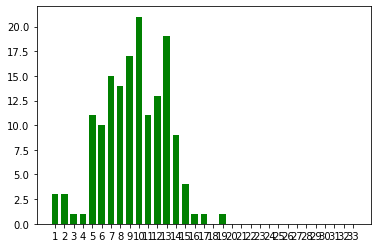

In [3]:
plt.xticks(np.arange(min(currentDay), max(currentDay)+1, 1.0))
plt.bar(currentDay,newInfected, color="green",width=0.7)
#print(currentDay)


In [4]:
import imageio
images=[]
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('people_move_movie.gif', images,duration=0.5)
images=[]
for filename in filenames2:
    images.append(imageio.imread(filename))
imageio.mimsave('cases.gif', images,duration=0.5)

In [5]:
for i in range(0,len(people)):
    relationshipFile2.write(str(i))
    for j in Grelationship.neighbors(i):
        relationshipFile2.write(',')
        relationshipFile2.write(str(j))
    relationshipFile2.write('\n')

relationshipFile2.close()

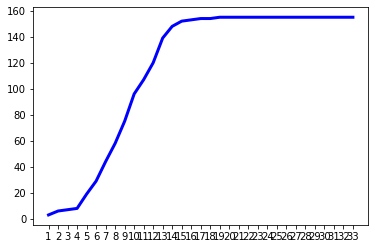

In [6]:
plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
plt.plot(list1,list2, color='blue', linewidth=3)
plt.show()